**This notebook is derived from the tutorial on [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) by [Rachael Tatman](https://www.kaggle.com/rtatman) at [kaggle](https://www.kaggle.com/)**

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

#for Box-Cox Transformation
from scipy import stats

#for min-max scaling
from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset
Kickstarter campaigns: Kickstarter is a website where people can ask people to invest in various projects and concepts products.

In [7]:
data = pd.read_csv("ks-projects-201801.csv")
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Scaling
Let's start by scaling the goals of each campaign, which is how much money they were asking for. The plots show a histogram of the values in the "usd_goal_real" column, both before and after scaling.

In [8]:
# create a df of usd_goal
original_data = pd.DataFrame(data.usd_goal_real)
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

**Let's plot both data to compare:**

Text(0.5, 1.0, 'Scaled Data')

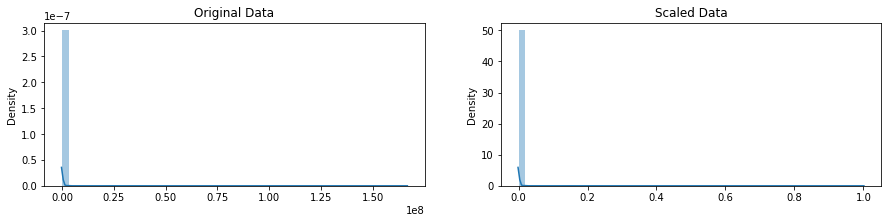

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,3))
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")

After scaling, all values lie between 0 and 1 (you can read this in the horizontal axis of the second plot above, and we verify in the code cell below).

In [11]:
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


Now consider the "goal" column. We will try to scale the values of "goal"

In [14]:
# create a df of usd_goal
original_goal = pd.DataFrame(data.goal)
scaled_goal = minmax_scaling(original_goal, columns=['goal'])

**Plot both data to compare:**

Text(0.5, 1.0, 'Scaled Goal Data')

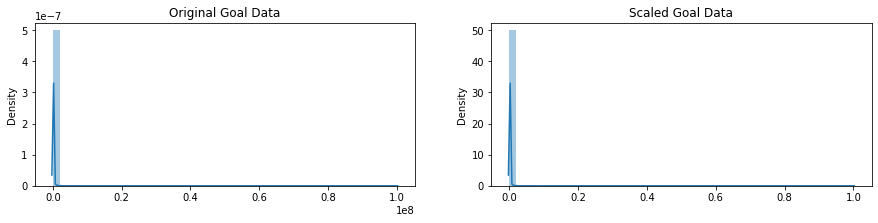

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,3))
sns.distplot(original_goal, ax=ax[0])
ax[0].set_title("Original Goal Data")

sns.distplot(scaled_goal, ax=ax[1])
ax[1].set_title("Scaled Goal Data")

In [16]:
print('Original data\nPreview:\n', original_goal.head())
print('Minimum value:', float(original_goal.min()),
      '\nMaximum value:', float(original_goal.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_goal.head())
print('Minimum value:', float(scaled_goal.min()),
      '\nMaximum value:', float(scaled_goal.max()))

Original data
Preview:
       goal
0   1000.0
1  30000.0
2  45000.0
3   5000.0
4  19500.0
Minimum value: 0.01 
Maximum value: 100000000.0
______________________________

Scaled data
Preview:
        goal
0  0.000010
1  0.000300
2  0.000450
3  0.000050
4  0.000195
Minimum value: 0.0 
Maximum value: 1.0


## Normalisation
 We begin by normalizing the amount of money pledged to each campaign.

In [17]:
# Get index of all positive pledges(Box-Cox only takes positive values)
index_of_positive_pledges = data.usd_pledged_real>0

# Get only positive pledges (Using indexes)
positive_pledges = data.usd_pledged_real.loc[index_of_positive_pledges]

# Normalise with Box-Cox
normalised_pledges = pd.Series(stats.boxcox(positive_pledges)[0], name='usd_pledged_real', 
                              index=positive_pledges.index)

**Plot both to compare:**

Text(0.5, 1.0, 'Normalised data')

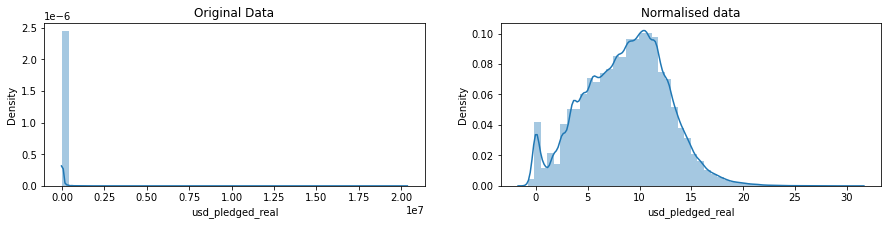

In [20]:
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(normalised_pledges, ax=ax[1])
ax[1].set_title("Normalised data")

Notice that it is not a perfect curve, but it is much closer to normal distribution.

In [21]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalised_pledges.head())
print('Minimum value:', float(normalised_pledges.min()),
      '\nMaximum value:', float(normalised_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


Now we are going to do the same with "pledged" column.

In [22]:
# Get index of all positive pledges(Box-Cox only takes positive values)
index_of_positive_pledge = data.pledged>0

# Get only positive pledges (Using indexes)
positive_pledge = data.pledged.loc[index_of_positive_pledge]

# Normalise with Box-Cox
normalised_pledge = pd.Series(stats.boxcox(positive_pledge)[0], name='pledged', 
                              index=positive_pledge.index)

Text(0.5, 1.0, 'Normalised data')

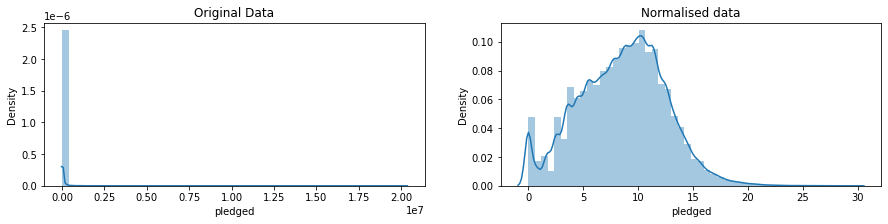

In [23]:
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledge, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(normalised_pledge, ax=ax[1])
ax[1].set_title("Normalised data")

In [24]:
print('Original data\nPreview:\n', positive_pledge.head())
print('Minimum value:', float(positive_pledge.min()),
      '\nMaximum value:', float(positive_pledge.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalised_pledge.head())
print('Minimum value:', float(normalised_pledge.min()),
      '\nMaximum value:', float(normalised_pledge.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: pledged, dtype: float64
Minimum value: 1.0 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.013887
2     6.403367
3     0.000000
4     9.005193
5    15.499596
Name: pledged, dtype: float64
Minimum value: 0.0 
Maximum value: 29.63030787418848
